# Outlier removal using Z_score
* The attribute should be normally distributed to handle outliers using z score
* If the Z-score of a value does not lie in the range of -3 to +3, then its considered an outlier
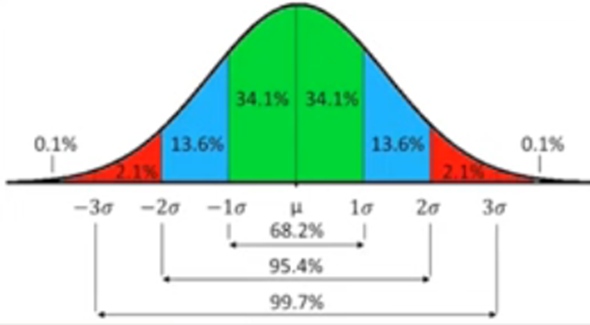

In [ ]:
# Load dataset
import numpy as np
import pandas as pd

df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


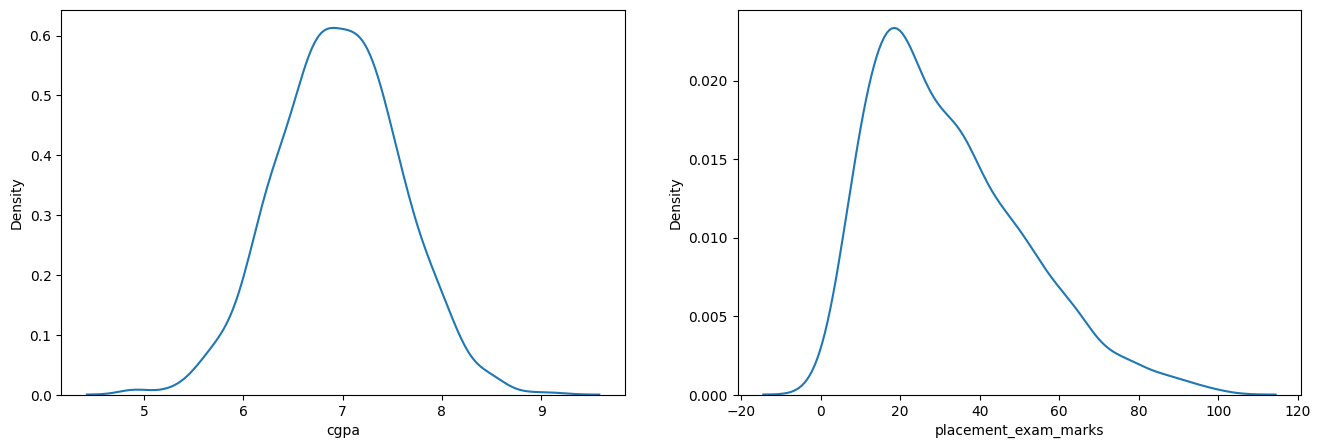

In [ ]:
# Plotting kdeplot of cgpa and placement_marks => Only cgpa is normally distributed
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])

plt.show()

In [ ]:
# Viewing statistics of cgpa
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961240
std,0.615898
min,4.890000
25%,6.550000
50%,6.960000
75%,7.370000
max,9.120000


In [ ]:
# Finding the boundary values :- (u - 3s to u + 3s)
print("Heighest :- ", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest :- ", df['cgpa'].mean() - 3*df['cgpa'].std())

Heighest :-  8.808933625397168
Lowest :-  5.113546374602832


In [ ]:
# Finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming - Removing outliers

In [ ]:
# Approach 1 :- Calculationg lower and upper bound
upper = df['cgpa'].mean() + 3*df['cgpa'].std()
lower = df['cgpa'].mean() - 3*df['cgpa'].std()

new_df = df[(df['cgpa']<upper)&(df['cgpa']>lower)]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
113,7.24,10.0,0
184,7.78,33.0,0
511,7.53,50.0,0
378,7.27,25.0,1
164,6.29,34.0,1


In [ ]:
# Approach 2 :- Calculating Z_score
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

new_df = df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
new_df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
434,7.01,5.0,0,0.079169
116,7.16,21.0,0,0.322716
611,7.20,19.0,1,0.387662
105,6.72,12.0,1,-0.391688
762,6.79,14.0,1,-0.278033


In [ ]:
new_df.shape

(995, 4)

In [ ]:
new_df['cgpa'].describe()

,cgpa
count,995.000000
mean,6.963357
std,0.600082
min,5.230000
25%,6.550000
50%,6.960000
75%,7.365000
max,8.620000


## Capping outliers :- Replacing outliers

In [ ]:
upper = df['cgpa'].mean() + 3*df['cgpa'].std()
lower = df['cgpa'].mean() - 3*df['cgpa'].std()

df['cgpa'] = df['cgpa'].clip(lower, upper)
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
295,6.02,64.0,0,-1.528240
932,6.89,71.0,0,-0.115669
145,7.08,28.0,0,0.192824
2,7.54,40.0,1,0.939701
944,7.21,21.0,1,0.403898


In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
